In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('/content/State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [ ]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024
0,9,0,California,state,NaN,192470.060335,193117.009656,193990.549660,195886.744543,198090.785451,...,760025.643822,766336.724042,770852.982715,773728.370200,774273.309545,774116.644365,775636.207722,779594.216542,784195.835143,786730.276988
1,54,1,Texas,state,NaN,113226.801439,113288.331807,113318.175000,113466.289412,113562.210628,...,307551.282143,307315.284600,306814.436216,306195.784974,305992.482068,306258.438358,307147.339059,308019.592897,308356.980100,308121.158599
2,14,2,Florida,state,NaN,107306.038895,107538.473764,107820.231157,108392.971467,109010.610173,...,392918.951496,393985.127566,394919.934792,395754.227659,396461.854007,397191.585312,398058.169878,398740.305800,398865.191001,398076.903152
3,43,3,New York,state,NaN,154844.923450,155396.323483,155927.134937,157068.766074,158249.946200,...,456703.550090,458597.486032,460179.119658,461911.116311,463746.784413,466013.773927,469063.607818,472791.569372,476218.118558,478973.354185
4,47,4,Pennsylvania,state,NaN,100629.177650,100844.415840,101046.681922,101458.869462,101882.289273,...,263668.020289,264588.144590,265141.010033,265594.055411,266115.237904,266968.513152,268327.586206,270041.807157,271568.390887,272477.133562


In [ ]:
# Filter the data for Texas
texas_data = df[df['RegionName'] == 'Texas']

# Drop unnecessary columns
texas_data = texas_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

# Transpose the dataframe to get dates as rows
texas_data = texas_data.T
texas_data.reset_index(inplace=True)

# Rename the columns
texas_data.columns = ['Date', 'HousePrice']

# Convert the 'HousePrice' column to numeric
texas_data['HousePrice'] = pd.to_numeric(texas_data['HousePrice'], errors='coerce')

# Display the first few rows
print(texas_data.head())

        Date     HousePrice
0  1/31/2000  113226.801439
1  2/29/2000  113288.331807
2  3/31/2000  113318.175000
3  4/30/2000  113466.289412
4  5/31/2000  113562.210628


In [ ]:
texas_data.describe()

,HousePrice
count,294.000000
mean,172275.314179
std,58025.737963
min,113226.801439
25%,135428.900518
50%,144019.440317
75%,203125.290591
max,313811.255480


In [ ]:
texas_data.isnull().sum()

Date          0
HousePrice    0
dtype: int64

##Plotting the data

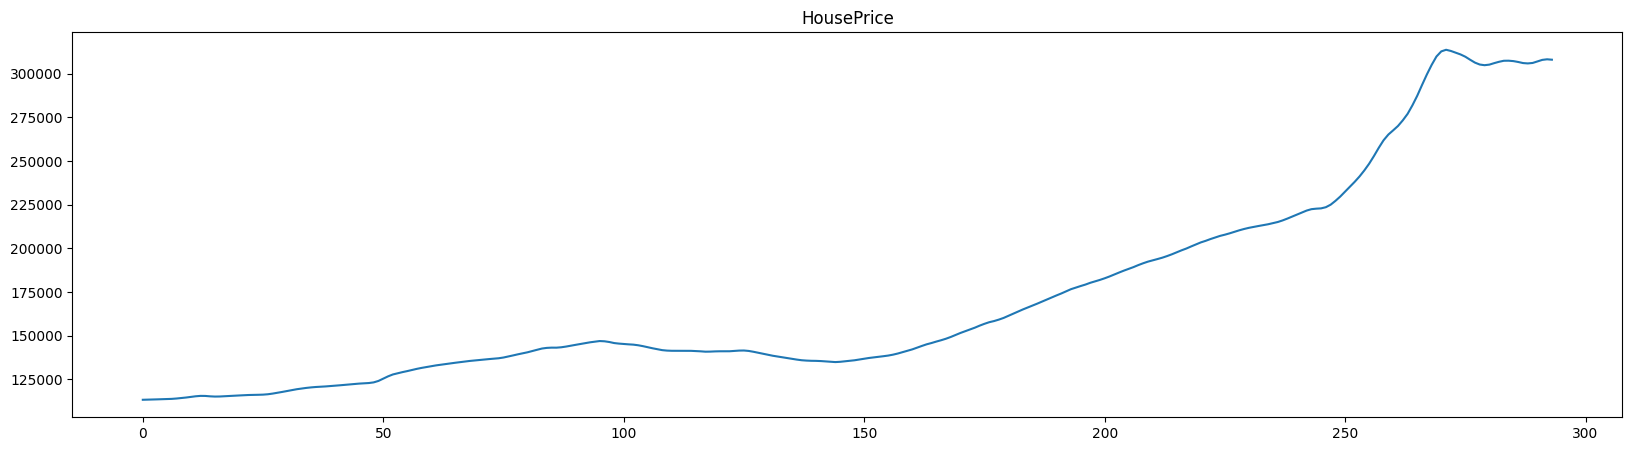

In [ ]:
import matplotlib.pyplot as plt
texas_data.HousePrice.plot(figsize=(20,5), title = "HousePrice")
plt.show()

In [ ]:
!pip install statsmodels


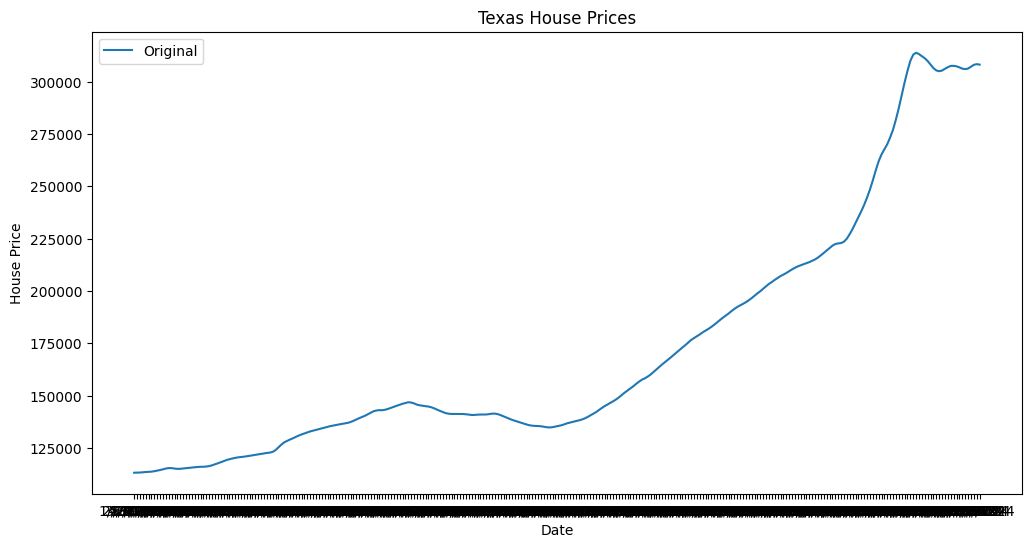

In [ ]:
import matplotlib.pyplot as plt

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(texas_data['Date'], texas_data['HousePrice'], label='Original')
plt.xlabel('Date')
plt.ylabel('House Price')
plt.title('Texas House Prices')
plt.legend()
plt.show()

Upward trend, No seasonality.
there is no clear indication of seasonality (repeated patterns at regular intervals), but there are noticeable periods of rapid price increase.
There appears to be some volatility or fluctuations in the prices, especially in the more recent dates where prices spike sharply.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(texas_data['HousePrice'].dropna())

# Extract and display test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}):', value)

ADF Statistic: 1.198795429720918
p-value: 0.9959775501455653
Critical Value (1%): -3.4540935579190495
Critical Value (5%): -2.8719934111688965
Critical Value (10%): -2.5723401594120388


By ADF also it is evident that it is not stationary

In [ ]:
import scipy.stats
import pylab

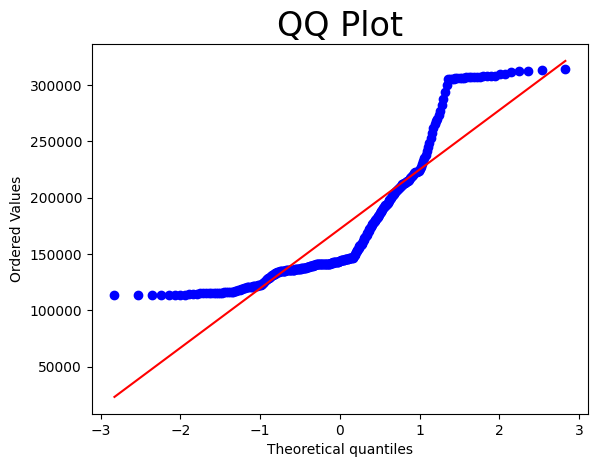

In [ ]:
scipy.stats.probplot(texas_data.HousePrice, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

Not normally distrubuted

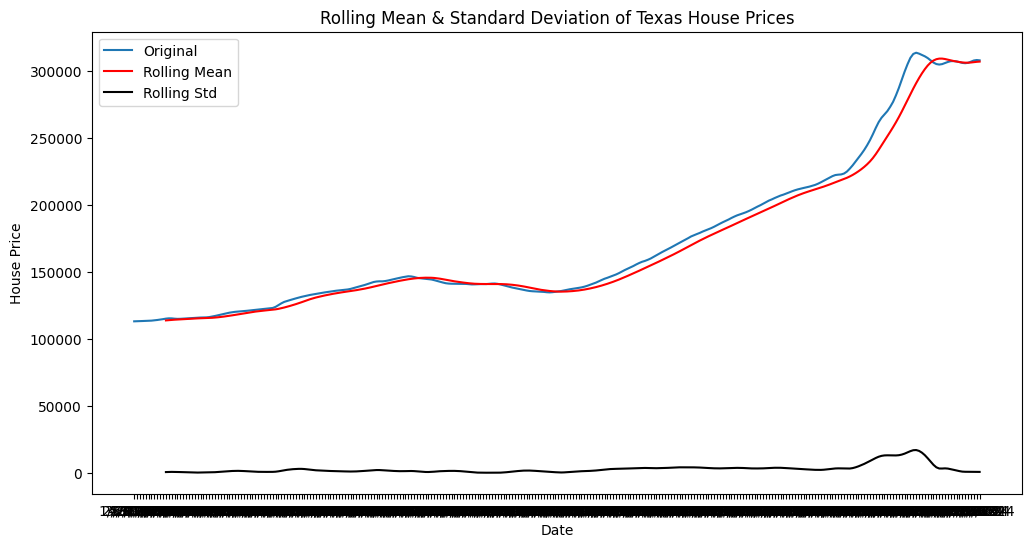

In [ ]:
# Calculate rolling mean and standard deviation
rolling_mean = texas_data['HousePrice'].rolling(window=12).mean()
rolling_std = texas_data['HousePrice'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(texas_data['Date'], texas_data['HousePrice'], label='Original')
plt.plot(texas_data['Date'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(texas_data['Date'], rolling_std, label='Rolling Std', color='black')
plt.xlabel('Date')
plt.ylabel('House Price')
plt.title('Rolling Mean & Standard Deviation of Texas House Prices')
plt.legend()
plt.show()

In [ ]:
texas_data.Date = pd.to_datetime(texas_data.Date, dayfirst = True)

<ipython-input-12-21caeb0267a5>:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  texas_data.Date = pd.to_datetime(texas_data.Date, dayfirst = True)


In [ ]:
texas_data.set_index("Date", inplace=True)

In [ ]:
texas_data.head(2)

,HousePrice
Date,
2000-01-31,113226.801439
2000-02-29,113288.331807


In [ ]:
# Check the frequency of the Date column
df.index.to_series().diff().value_counts()

1.0    50
Name: count, dtype: int64

In [ ]:
# Check the date range and ensure no missing months
print(df.index.min(), df.index.max())
print(df.index.to_series().is_monotonic_increasing)
print(df.index.to_series().is_unique)

0 50
True
True


##Splitting the data

In [ ]:
size = int(len(texas_data)*0.8)

In [ ]:
df = texas_data.iloc[:size]

In [ ]:
df_test = texas_data.iloc[size:]

In [ ]:
df.tail(2)

,HousePrice
Date,
2019-06-30,213307.065479
2019-07-31,213820.273719


In [ ]:
df_test.head(2)

,HousePrice
Date,
2019-08-31,214435.413215
2019-09-30,215107.589876


In [ ]:
import numpy as np
wn = np.random.normal(loc = df.HousePrice.mean(), scale = df.HousePrice.std(), size = len(df))

In [ ]:
df['wn'] = wn

<ipython-input-26-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [ ]:
df.head(2)

,HousePrice,wn
Date,,
2000-01-31,113226.801439,147020.896048
2000-02-29,113288.331807,114548.721043


In [ ]:
df.describe()

,HousePrice,wn
count,235.000000,235.000000
mean,147204.174968,147383.917633
std,26843.237688,27347.315325
min,113226.801439,41031.790758
25%,131755.393453,129631.836062
50%,141007.341491,148508.494400
75%,157218.651856,164169.242986
max,213820.273719,219020.324608


Mean of two columns are similar. white noise value are normally distributed around mean of unit generated.

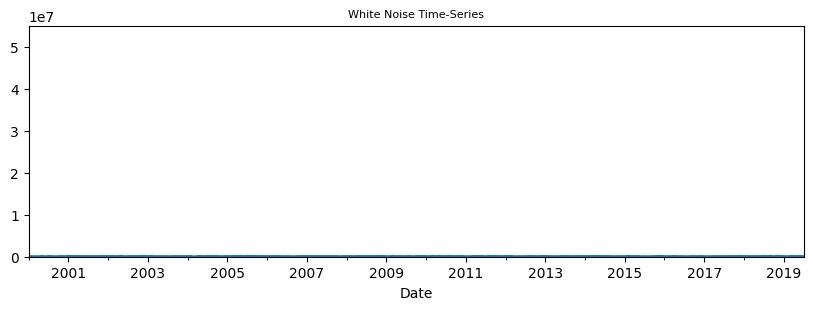

In [ ]:
df.wn.plot(figsize = (10,3))
plt.title("White Noise Time-Series", size= 8)
plt.ylim(0,55000000)
plt.show()

In [ ]:
# Difference the data
texas_data['HousePrice_diff'] = texas_data['HousePrice'].diff().dropna()

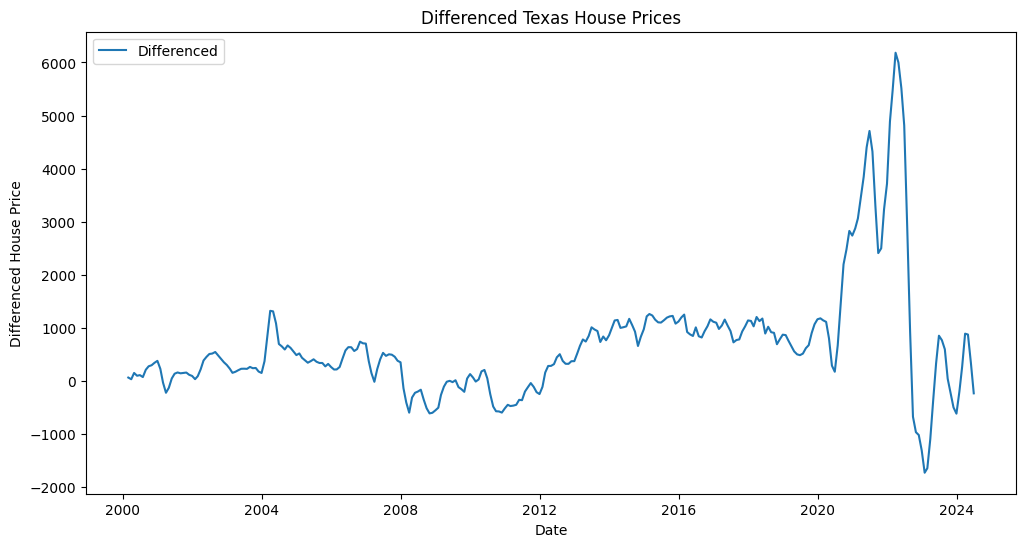

In [ ]:
# Plot the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(texas_data.index[1:], texas_data['HousePrice_diff'].iloc[1:], label='Differenced')
plt.xlabel('Date')
plt.ylabel('Differenced House Price')
plt.title('Differenced Texas House Prices')
plt.legend()
plt.show()

In [ ]:
# Perform ADF test on differenced data
result_diff = adfuller(texas_data['HousePrice_diff'].dropna())
adf_statistic_diff, p_value_diff, critical_values_diff = result_diff[0], result_diff[1], result_diff[4]

In [ ]:
print('ADF Statistic:', adf_statistic_diff)
print('p-value:', p_value_diff)
for key, value in critical_values_diff.items():
    print(f'Critical Value ({key}):', value)

ADF Statistic: -3.299489293235944
p-value: 0.01490131853867662
Critical Value (1%): -3.4540935579190495
Critical Value (5%): -2.8719934111688965
Critical Value (10%): -2.5723401594120388


data became stationary

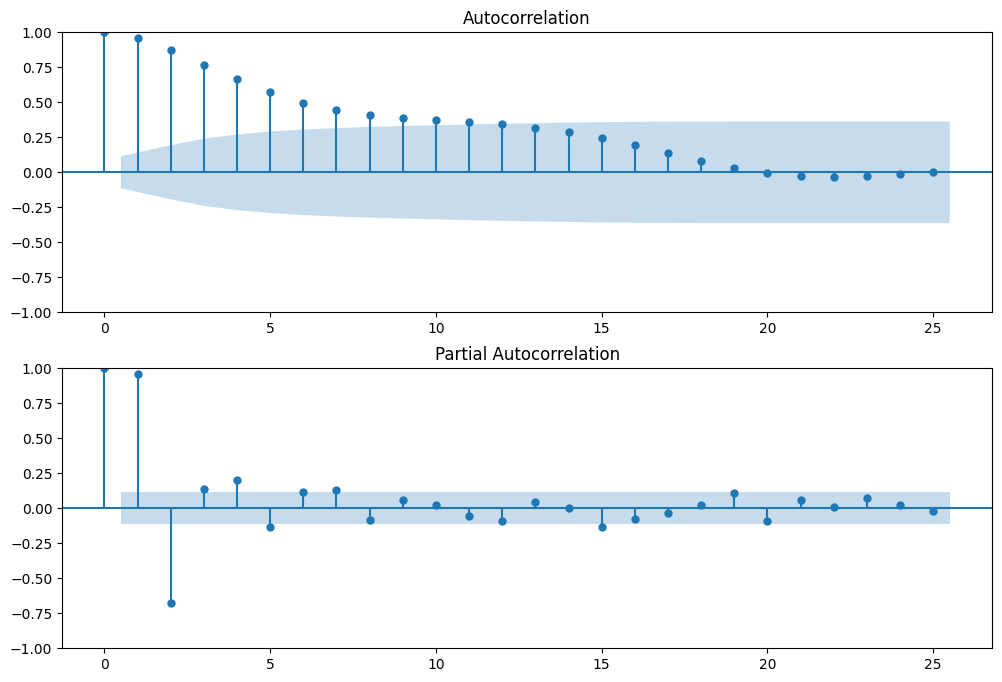

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(texas_data['HousePrice_diff'].dropna(), ax=ax[0])
plot_pacf(texas_data['HousePrice_diff'].dropna(), ax=ax[1])

plt.show()

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

# Perform a grid search to find the best parameters for ARIMA model
model = pm.auto_arima(texas_data['HousePrice'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=6, max_q=6, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=4103.692, Time=1.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4164.057, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4101.824, Time=0.51 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=4113.437, Time=0.86 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4162.061, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4103.606, Time=0.76 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=4089.885, Time=1.54 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=4087.776, Time=3.85 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4094.289, Time=1.07 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=4090.321, Time=3.50 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=4089.953, Time=2.00 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=4099.822, Time=1.38 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=4095.306, Time=1.21 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=4093.372, Time=4.90 sec
 ARIMA(3,2,1)(0,0,0)[0]          

In [ ]:
# Difference the data 2nd time
texas_data['HousePrice_diff2'] = texas_data['HousePrice_diff'].diff().dropna()

In [ ]:
# Perform ADF test on differenced data
result_diff = adfuller(texas_data['HousePrice_diff2'].dropna())
adf_statistic_diff, p_value_diff, critical_values_diff = result_diff[0], result_diff[1], result_diff[4]

In [ ]:
print('ADF Statistic:', adf_statistic_diff)
print('p-value:', p_value_diff)
for key, value in critical_values_diff.items():
    print(f'Critical Value ({key}):', value)

ADF Statistic: -4.531309680540171
p-value: 0.0001725514080860141
Critical Value (1%): -3.4541800885158525
Critical Value (5%): -2.872031361137725
Critical Value (10%): -2.5723603999791473


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


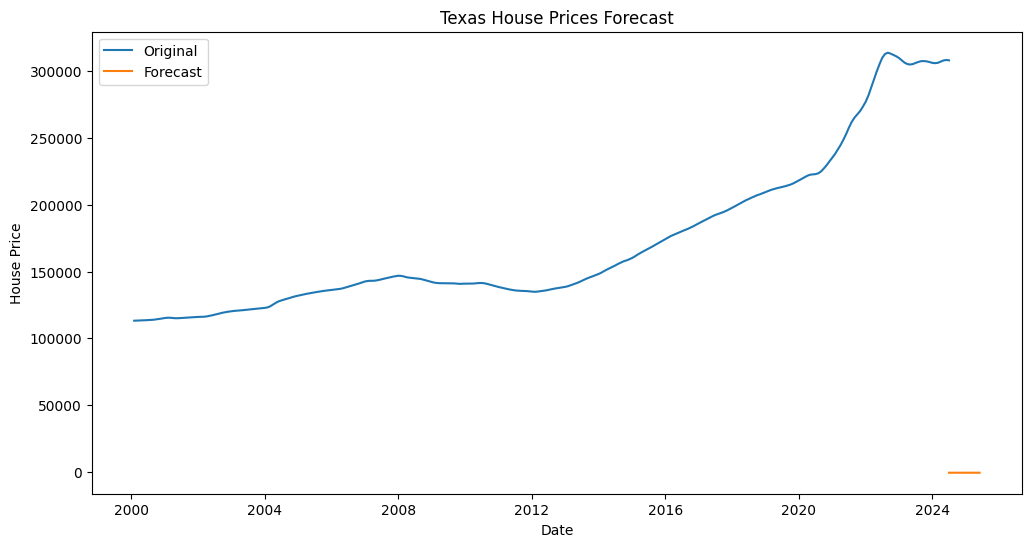

In [ ]:
# Assuming the data is in monthly frequency and ready for analysis
import statsmodels.api as sm

# Fit ARIMA model (using the previously determined parameters)
model = sm.tsa.ARIMA(texas_data['HousePrice_diff2'].dropna(), order=(1, 1, 1))
result = model.fit()

# Forecast future values
forecast_steps = 12  # Number of steps to forecast
forecast = result.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(texas_data.index, texas_data['HousePrice'], label='Original')
plt.plot(pd.date_range(start=texas_data.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('House Price')
plt.title('Texas House Prices Forecast')
plt.legend()
plt.show()

In [ ]:
# Fit ARIMA model (p, d, q)
# For example, ARIMA(1, 1, 1)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(texas_data['HousePrice'], order=(3, 2, 1))
model_fit = model.fit()

In [ ]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             HousePrice   No. Observations:                  294
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -2037.888
Date:                Sun, 21 Jul 2024   AIC                           4085.776
Time:                        10:38:37   BIC                           4104.160
Sample:                             0   HQIC                          4093.140
                                - 294                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0753      0.075     14.274      0.000       0.928       1.223
ar.L2         -0.2156      0.043     -5.040      0.000      -0.299      -0.132
ar.L3         -0.0926      0.023     -3.975      0.0

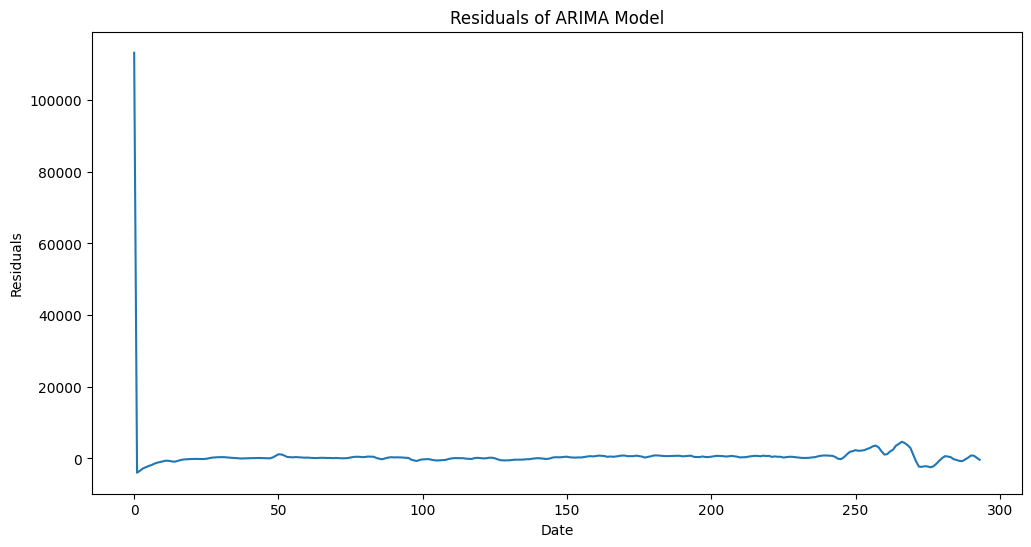

In [ ]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of ARIMA Model')
plt.show()

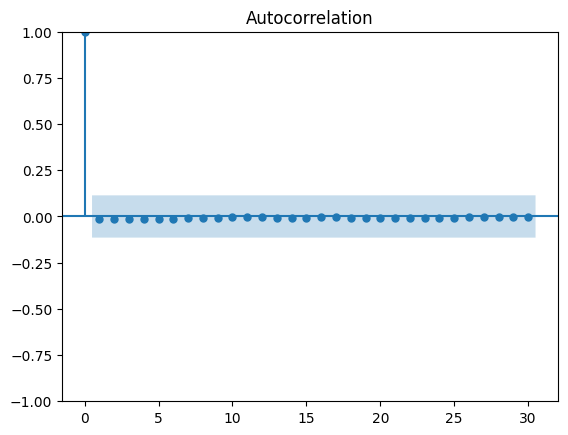

In [ ]:
# Plot ACF of residuals
plot_acf(residuals, lags=30)
plt.show()

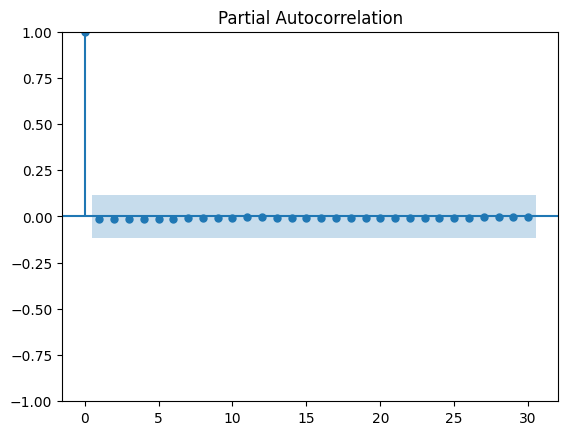

In [ ]:
# Plot PACF of residuals
plot_pacf(residuals, lags=30)
plt.show()

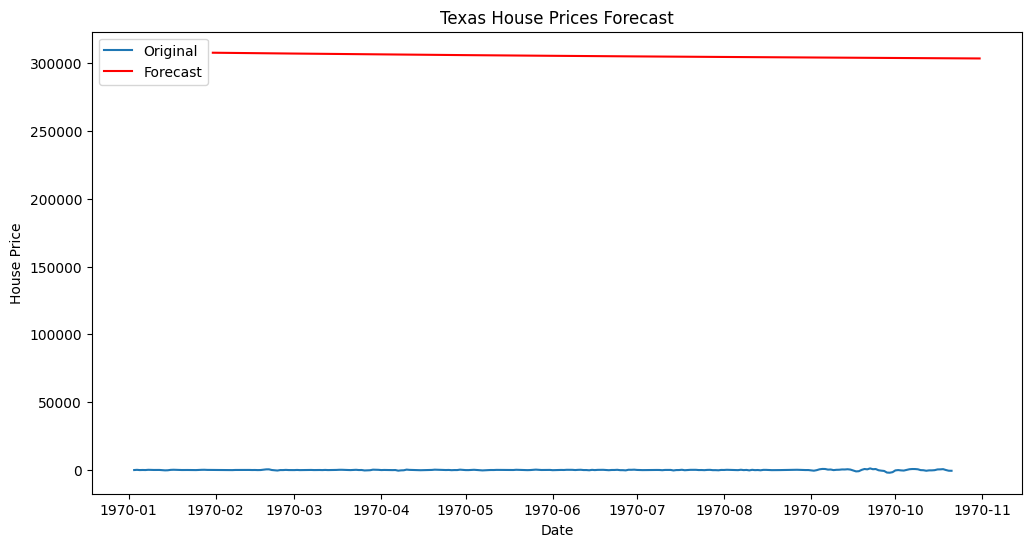

In [ ]:
# Forecasting
forecast_steps = 10  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(texas_data.index, texas_data['HousePrice_diff2'], label='Original')
plt.plot(pd.date_range(start=texas_data.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('House Price')
plt.title('Texas House Prices Forecast')
plt.legend()
plt.show()